# Test Best 2 models with best params

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import csv
import dateutil.parser
import json
import calendar
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import requests
#from urllib2 import Request, urlopen
from pandas.io.json import json_normalize
from pprint import pprint
from patsy import dmatrices
from sklearn.model_selection import StratifiedKFold

import pickle

In [2]:
X_test=pd.read_csv('X_test.csv')

In [3]:
y_test=pd.read_csv('y_test.csv', header=None)

In [4]:
X_test.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
y_test.head()

,0,1
0,92510,0
1,54509,0
2,40023,0
3,106425,0
4,42611,0


In [6]:
len(X_test)

45777

In [7]:
y_test.drop(columns=[ 0],inplace=True)

In [8]:
y_test.rename(columns={1:'flux'},inplace=True)

In [9]:
y_test.head()

,flux
0,0
1,0
2,0
3,0
4,0


### Encode categorical data

In [10]:
X_test['hour']=X_test['hour'].astype('category')
X_test['hour'].dtype

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23],
                 ordered=False)

In [11]:
new_df=pd.concat([X_test,y_test],axis=1)

In [12]:
new_df.head()

,start_station_name,day_wk,hour,temperature,summary,windSpeed,visibility,flux
0,Market St at 10th St,Tuesday,21,54.35,Clear,0.42,10.0,0
1,Cyril Magnin St at Ellis St,Saturday,5,60.76,Mostly Cloudy,3.41,10.0,0
2,Bryant St at 6th St,Saturday,22,49.32,Clear,1.10,10.0,0
3,Post St at Kearny St,Wednesday,10,56.02,Clear,0.74,10.0,0
4,Civic Center/UN Plaza BART Station (Market St ...,Friday,17,80.26,Clear,4.02,10.0,0


In [13]:
y_te, X_te = dmatrices('flux ~ day_wk +hour+temperature+summary+windSpeed+visibility-1',\
                       data=new_df, return_type='dataframe')

In [14]:
X_te.head()

,day_wk[Friday],day_wk[Monday],day_wk[Saturday],day_wk[Sunday],day_wk[Thursday],day_wk[Tuesday],day_wk[Wednesday],hour[T.1],hour[T.2],hour[T.3],...,hour[T.22],hour[T.23],summary[T.Light Rain],summary[T.Mostly Cloudy],summary[T.Overcast],summary[T.Partly Cloudy],summary[T.Rain],temperature,windSpeed,visibility
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.35,0.42,10.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.76,3.41,10.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49.32,1.10,10.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.02,0.74,10.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.26,4.02,10.0


In [15]:
y_te.flux.value_counts()

0.0    42453
2.0     2136
1.0     1188
Name: flux, dtype: int64

### TEST Gradient boosting and RF Classifier

In [16]:
#gradient_boosting
from sklearn.metrics import classification_report
gbc = pickle.load(open('model_gbc.pkl', 'rb'))

y_pred = gbc.predict(X_te)

print(classification_report(y_te, y_pred))   

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90     42453
         1.0       0.11      0.36      0.17      1188
         2.0       0.15      0.35      0.21      2136

   micro avg       0.81      0.81      0.81     45777
   macro avg       0.41      0.52      0.42     45777
weighted avg       0.91      0.81      0.85     45777



In [17]:
#random Forest
from sklearn.metrics import classification_report
rbc = pickle.load(open('model_rbc.pkl', 'rb'))

y_pred_rf = rbc.predict(X_te)

print(classification_report(y_te, y_pred_rf))  

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     42453
         1.0       0.13      0.38      0.19      1188
         2.0       0.23      0.29      0.26      2136

   micro avg       0.86      0.86      0.86     45777
   macro avg       0.44      0.52      0.46     45777
weighted avg       0.91      0.86      0.88     45777



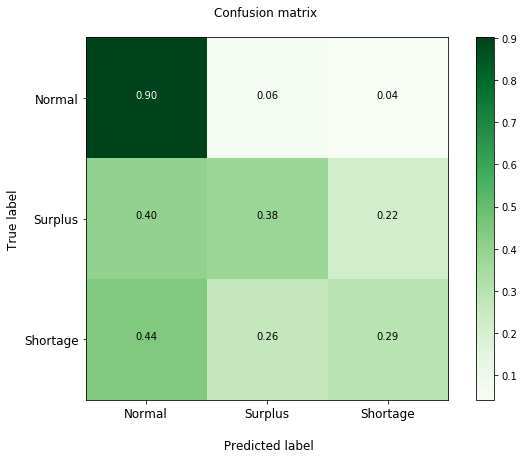

In [206]:
# Generate a confusion matrix plot: 
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm,title='Confusion matrix \n', cmap=plt.cm.Greens,fontweight='bold',fontsize=14):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.xticks(range(cm.shape[1]),labels=['Normal','Surplus','Shortage'],fontsize=12)
    plt.yticks(range(cm.shape[0]),labels=['Normal','Surplus','Shortage'],fontsize=12)
    plt.ylabel('True label',fontsize=12)
    plt.xlabel('\n Predicted label',fontsize=12)


    
cm=confusion_matrix(y_te, y_pred_rf, labels=None)
cm=cm.astype('float') /cm.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=[8,6])
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plot_confusion_matrix(cm)

In [19]:
from sklearn.dummy import DummyClassifier

### ROC CURVE FOR RANDOM FOREST

In [88]:
X_res=pd.read_csv('X_res.csv')

In [89]:
y_res=pd.read_csv('y_res.csv')

In [90]:
X_res.drop(columns=['Unnamed: 0'],inplace=True)

In [91]:
y_res.head()

,Unnamed: 0,0
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [92]:
y_res.drop(columns=[ 'Unnamed: 0'],inplace=True)

In [93]:
len(y_res)

199713

In [94]:
y_res.rename(columns={0:'flux'},inplace=True)

In [95]:
columns=['day_wk[Friday]', 'day_wk[Monday]', 'day_wk[Saturday]',
       'day_wk[Sunday]', 'day_wk[Thursday]', 'day_wk[Tuesday]',
       'day_wk[Wednesday]', 'hour[T.1]', 'hour[T.2]', 'hour[T.3]', 'hour[T.4]',
       'hour[T.5]', 'hour[T.6]', 'hour[T.7]', 'hour[T.8]', 'hour[T.9]',
       'hour[T.10]', 'hour[T.11]', 'hour[T.12]', 'hour[T.13]', 'hour[T.14]',
       'hour[T.15]', 'hour[T.16]', 'hour[T.17]', 'hour[T.18]', 'hour[T.19]',
       'hour[T.20]', 'hour[T.21]', 'hour[T.22]', 'hour[T.23]',
       'summary[T.Light Rain]', 'summary[T.Mostly Cloudy]',
       'summary[T.Overcast]', 'summary[T.Partly Cloudy]', 'summary[T.Rain]',
       'temperature', 'windSpeed', 'visibility']

In [96]:
column_no=[i for i in range(0,38)]

In [97]:
dict_col={str(k):v for k,v in zip(column_no,columns)}

In [98]:
X_res.rename(columns=dict_col,inplace=True)

In [99]:
len(X_res)

199713

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with


# Binarize the output
y_res = label_binarize(y_res, classes=[0, 1, 2])
n_classes = y_res.shape[1]
y_test = label_binarize(y_te, classes=[0, 1, 2])

# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, verbose=0,
            warm_start=False,random_state=42))


In [175]:
ovrmodel= classifier.fit(X_res, y_res)
y_score= ovrmodel.predict_proba(X_te)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

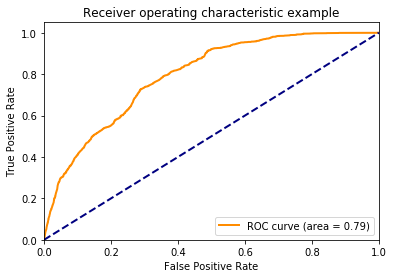

In [217]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

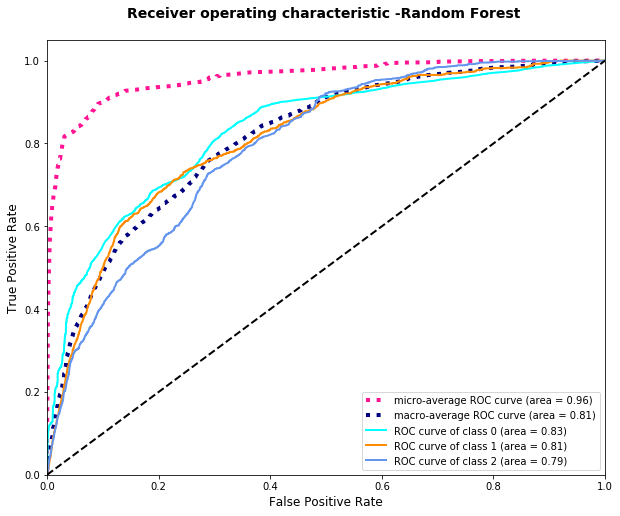

In [199]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=[10,8])
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver operating characteristic -Random Forest \n',fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
plt.show()

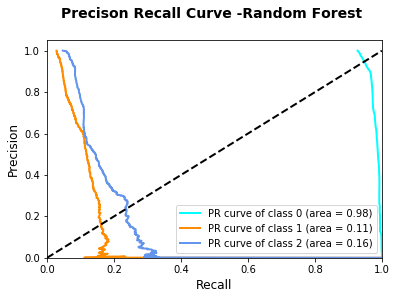

In [215]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision = dict()
recall = dict()
average_precision = dict()

n_classes = [0,1,2]

for i in range(len(n_classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(n_classes, colors):
    plt.plot(precision[i], recall[i], color=color, lw=lw,
             label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(i, average_precision[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision',fontsize=12)
plt.title('Precison Recall Curve -Random Forest \n',fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
plt.show()


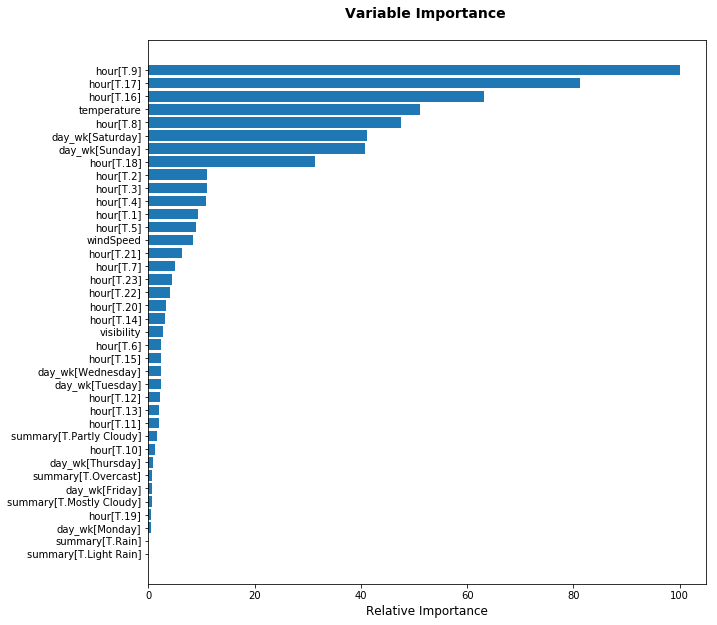

In [196]:
# Feature Importance
# Plot feature importance most important hr 9M 5 PM 4 PM AND TEMPERATURE
feature_importance = rbc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=[10,10])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_res.columns[sorted_idx])
plt.xlabel('Relative Importance',fontsize=12)
plt.title('Variable Importance \n',fontweight='bold',fontsize=14)
plt.show()


### CHOOSE A THRESHOLD  TO MAXIMIZE RECALL ON ALL CLASSES BY MAXIMIZING RECALL FOR EACH CLASS

In [218]:
from scipy.spatial import distance

Optimum thresholds for class 0,1,2 {0: (0.2957280385078219, 0.8027465667915106, 0.5014205425876443), 1: (0.24479131624391667, 0.7306397306397306, 0.26140201090754206), 2: (0.28862766664375245, 0.7275280898876404, 0.21875899314373512)}


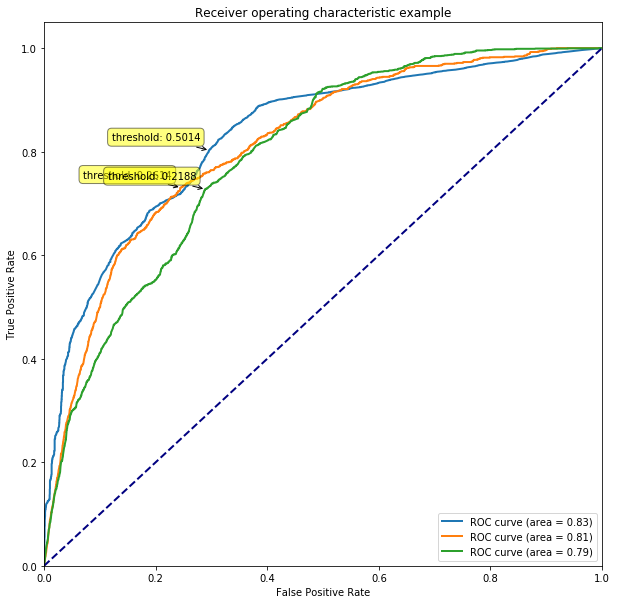

In [237]:
#optimal thresholds fro each class 0,1,2
n_classes=3


def optim_thres(fpr, tpr, threshold):
    TOP = np.array([0,1])
    xy = np.array(list(zip(fpr, tpr)))
    dist = [(i, distance.euclidean(TOP, v)) for i,v in enumerate(xy)]
    dist.sort(key = lambda x: x[1], reverse=False)
    i, d = dist[0]
    return (fpr[i], tpr[i], threshold[i])# final best value to mi=nimize diatance between (fpr,tpr) and (0,1) so 
#maximizes tpr by minimizing dist

# Compute ROC curve and ROC area for each class
TOP = np.array([0,1])
fpr = dict()
tpr = dict()
thres = dict()
roc_auc = dict()
optim = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thres[i] = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    ## next find optimal thres
    optim[i] = optim_thres(fpr[i], tpr[i], thres[i])

print('Optimum thresholds for class 0,1,2',optim)

plt.figure(figsize=[10,10])
lw = 2
axes = []
for i in range(n_classes):
    ax, = plt.plot(fpr[i], tpr[i], 
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axes.append(ax)
    _fpr, _tpr, _thres, = optim[i]
    label = "threshold: " + str(round(_thres, 4))
    plt.annotate(
        label,
        xy=(_fpr, _tpr), xytext=(-9, 8),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.4', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## CONCLUSION reset thresholds

In [257]:
threshold=[0.5014,0.2614,0.2188]

In [278]:
yhat=[]
for i in range(n_classes):
    yhat .append((y_score[:,i] > threshold[i]).astype(float))
    print(f'Accuracy Scores for class {i} after resetting thresholds',np.mean(yhat==y_test[:,i]))
    print(f'CR for class {i} after resetting thresholds\n',classification_report(y_test[:,i], yhat[i]))


Accuracy Scores for class 0 after resetting thresholds 0.7955960416803198
CR for class 0 after resetting thresholds
               precision    recall  f1-score   support

           0       0.22      0.70      0.33      3324
           1       0.97      0.80      0.88     42453

   micro avg       0.80      0.80      0.80     45777
   macro avg       0.60      0.75      0.61     45777
weighted avg       0.92      0.80      0.84     45777

Accuracy Scores for class 1 after resetting thresholds 0.48824737313498046
CR for class 1 after resetting thresholds
               precision    recall  f1-score   support

           0       0.99      0.76      0.86     44589
           1       0.07      0.73      0.13      1188

   micro avg       0.75      0.75      0.75     45777
   macro avg       0.53      0.74      0.50     45777
weighted avg       0.97      0.75      0.84     45777

Accuracy Scores for class 2 after resetting thresholds 0.5628663593798924
CR for class 2 after resetting thresh

## CONCLUSION
By resetting thresholds recall/Trure positive rate for all the classes0,1,2 improved to  0.8 0.73,0.73 respectively. We are accurately able to predict normal surplus or shortage of bikes more effectively
